In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

default = pd.read_csv('/Users/scrysam/Downloads/Transformed_Data_Case_Study.csv')
default.describe()
#default.head()

,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
count,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.549639,3.647563,4.506915e+06,0.362365,0.019404,0.190884,0.109657,0.317690,106.894404,289.539711,12444.084386,0.888087,1.797834,4.245939,7.455776,0.701715,0.626354,6.586191,4.390343,6.706679
std,1.168151,2.426504,6.361662e+07,0.480792,0.137972,0.393087,0.312532,0.465683,130.261704,384.232726,19718.042391,0.315331,6.890155,9.248390,8.792252,5.373450,2.772211,7.538480,7.647876,7.692315
min,1.000000,1.000000,-1.268348e+06,0.000000,0.000000,0.000000,0.000000,0.000000,-465.000000,0.000000,0.000000,0.000000,-6.000000,-12.000000,-25.000000,0.000000,-1.000000,-24.000000,-14.000000,-26.000000
25%,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,14.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,9.957000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,53.500000,151.000000,54.000000,1.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,2.000000,4.000000
75%,3.000000,4.000000,1.306575e+05,1.000000,0.000000,0.000000,0.000000,1.000000,148.250000,365.000000,43646.000000,1.000000,2.000000,6.000000,10.000000,0.000000,1.000000,9.000000,6.000000,9.000000
max,5.000000,9.000000,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1304.000000,2028.000000,44196.000000,1.000000,312.000000,351.000000,88.000000,234.000000,117.000000,86.000000,273.000000,91.000000


In [2]:
target_name = 'Target'
X = default.drop(['Target','OID'], axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
default.head()

,OID,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,...,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,OID1569,2,3,26079990.0,1,0,0,0,0,501,...,6,1,8,16,34,0,2,33,19,35
1,OID1850,1,1,13100000.0,1,0,0,0,0,249,...,78,1,4,8,17,0,1,16,9,17
2,OID1378,1,1,50658.0,1,0,0,0,0,4,...,13,1,0,0,0,0,0,0,0,0
3,OID1473,3,7,10168147.0,1,0,0,0,0,206,...,512,1,3,7,14,0,1,14,8,14
4,OID0125,4,1,143150.0,0,0,0,0,1,96,...,23,1,2,3,7,0,0,6,4,7


In [3]:
def CMatrix(CM, labels=['Prod','Target']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [4]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                      columns=['NULL', 'LogisticReg', 'ClassTree', 'NaiveBayes'])

y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,Prod,Target,Total
TRUE,,,
Prod,0,158,158
Target,0,1394,1394
Total,0,1552,1552


In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1)
logistic_regression.fit(X_train,y_train)

y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,Prod,Target,Total
TRUE,,,
Prod,42,116,158
Target,28,1366,1394
Total,70,1482,1552


In [6]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10)
class_tree.fit(X_train,y_train)

y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,Prod,Target,Total
TRUE,,,
Prod,125,33,158
Target,19,1375,1394
Total,144,1408,1552


In [7]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train,y_train)

y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,Prod,Target,Total
TRUE,,,
Prod,130,28,158
Target,414,980,1394
Total,544,1008,1552


In [8]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,89.8196,90.7216,96.6495,71.5206
precision,89.8196,92.1727,97.6562,97.2222
recall,100,97.9914,98.637,70.3013


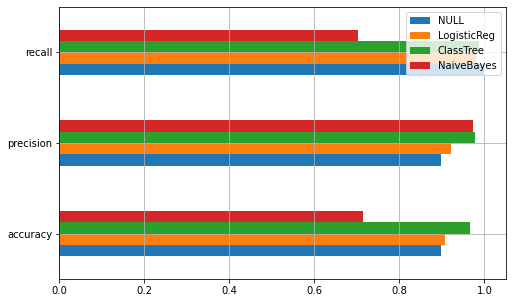

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [10]:
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test,probas_pred=class_tree.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,probas_pred=logistic_regression.predict_proba(X_test)[:,1])

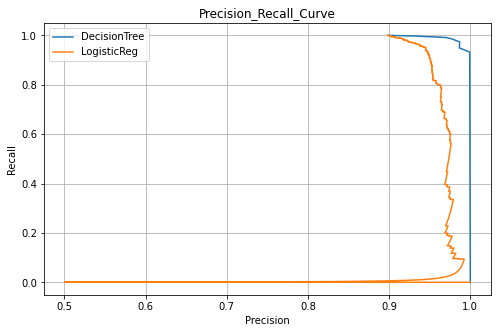

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_dt, recall_dt, label='DecisionTree')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision_Recall_Curve')
#ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

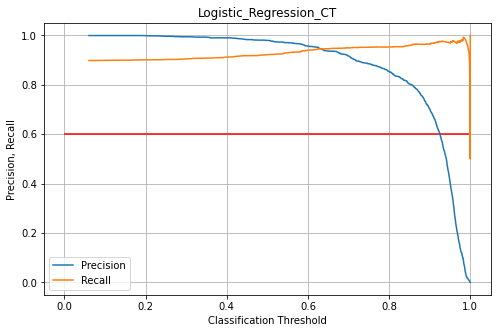

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, recall_lr[1:], label='Precision')
ax.plot(thresholds_lr,precision_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic_Regression_CT')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [13]:
#Classification Threshold is about 0.7, you will have a Recall of about 90% and a Precision of about 90%

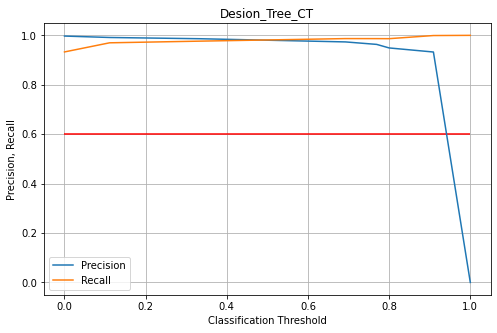

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_dt, recall_dt[1:], label='Precision')
ax.plot(thresholds_dt,precision_dt[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Desion_Tree_CT')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [15]:
#Classification Threshold is about 0.5, you will have a Recall greater than 95% and a Precision greater than 95%

In [19]:
class_tree.fit(X_train,y_train)

y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#y_pred_proba = class_tree.predict_proba(X_test)[1:]
#y_pred_test = (y_pred_proba >= 0.5).astype('int')
#Confusion Matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print ("Recall perc: ",100*recall_score(y_pred=y_pred_test, y_true=y_test))
print ("Precision perc: ",100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall perc:  98.63701578192251
Precision perc:  97.65625


PREDICTION,Prod,Target,Total
TRUE,,,
Prod,125,33,158
Target,19,1375,1394
Total,144,1408,1552
